In [79]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Data Preparation

## Retrive

In [49]:
# Reading Accounts' Data
accout = pd.read_csv("./dados/account.csv", sep=";")

# Reading Transactions' Data
trans = pd.read_csv("./dados/trans_dev.csv", sep=";");

# Reading Loans' Data
loan = pd.read_csv("./dados/loan_dev.csv", sep=";");

# Reading Districts' Client and Account Data
cli_demo_acc = pd.read_csv("./dados_tratados/client_demo_account.csv", sep=",");

# Reading Disponents' and Cards' Data
disp_card = pd.read_csv("./dados_limpos/disp_credit.csv", sep=";");





## Merging All dfs togheter 

In [50]:
# Merging Accounts' and Transactions' Data

all_data_df = pd.merge(accout, pd.DataFrame(trans.groupby('account_id').size(), columns=['# trans']), right_index=True, left_on='account_id', how="outer")



##### Changing some collums on the transactions table

In [51]:
# Oper 1 - credit in cash, Oper 2 - credit card withdrawal, Oper 3 - collection from another bank, Oper 4 - remittance to another bank, Oper 5 - withdrawal in cash
all_data_df = pd.merge(all_data_df, pd.DataFrame(trans[trans['operation']=='credit in cash'].groupby('account_id').size(), columns=['oper #1']), right_index=True, left_on='account_id', how="outer")
all_data_df = pd.merge(all_data_df, pd.DataFrame(trans[trans['operation']=='credit card withdrawal'].groupby('account_id').size(), columns=['oper #2']), right_index=True, left_on='account_id', how="outer")
all_data_df = pd.merge(all_data_df, pd.DataFrame(trans[trans['operation']=='collection from another bank'].groupby('account_id').size(), columns=['oper #3']), right_index=True, left_on='account_id', how="outer")
all_data_df = pd.merge(all_data_df, pd.DataFrame(trans[trans['operation']=='remittance to another bank'].groupby('account_id').size(), columns=['oper #4']), right_index=True, left_on='account_id', how="outer")
all_data_df = pd.merge(all_data_df, pd.DataFrame(trans[trans['operation']=='withdrawal in cash'].groupby('account_id').size(), columns=['oper #5']), right_index=True, left_on='account_id', how="outer")

# Type 1 - withdrawal, Type 2 - withdrawal in cash, Type 3 - credit 

all_data_df = pd.merge(all_data_df, pd.DataFrame(trans[trans['type']=='withdrawal'].groupby('account_id').size(), columns=['type #1']), right_index=True, left_on='account_id', how="outer")
all_data_df = pd.merge(all_data_df, pd.DataFrame(trans[trans['type']=='withdrawal in cash'].groupby('account_id').size(), columns=['type #2']), right_index=True, left_on='account_id', how="outer")
all_data_df = pd.merge(all_data_df, pd.DataFrame(trans[trans['type']=='credit'].groupby('account_id').size(), columns=['type #3']), right_index=True, left_on='account_id', how="outer")

all_data_df = pd.merge(all_data_df, pd.DataFrame(trans.groupby('account_id').amount.mean().round(2)).rename(columns={'amount':'avg trans amount'}), right_index=True, left_on='account_id', how="outer")
all_data_df = pd.merge(all_data_df, pd.DataFrame(trans.groupby('account_id').balance.mean().round(2)).rename(columns={'balance':'avg trans balance'}), right_index=True, left_on='account_id', how="outer")


In [92]:
all_data_df = pd.merge(all_data_df, loan.rename(columns={'date': 'loan date', 'amount': 'loan amount', 'duration': 'loan duration (mths)', 'payments': 'loan payments', 'status': 'loan status'}))
all_data_df = all_data_df.merge(loan)
all_data_df.head()


,account_id,district_id,frequency,date,# trans,oper #1,oper #2,oper #3,oper #4,oper #5,type #1,type #2,type #3,avg trans amount,avg trans balance,loan_id,loan date,loan amount,loan duration (mths),loan payments,loan status
0,5270,44,monthly issuance,930113,53.0,1.0,NaN,11.0,NaN,31.0,28.0,3.0,22.0,17600.36,69954.57,6077,931122,79608,24,3317,1
1,11265,15,monthly issuance,930114,43.0,14.0,NaN,NaN,8.0,14.0,22.0,NaN,21.0,3714.90,22198.18,7284,930915,52788,12,4399,1
2,10364,55,monthly issuance,930117,45.0,12.0,NaN,NaN,5.0,19.0,24.0,NaN,21.0,5957.54,34272.21,7121,931110,21924,36,609,1
3,3834,54,monthly issuance,930119,171.0,29.0,NaN,NaN,61.0,62.0,123.0,NaN,48.0,3618.33,23771.97,5754,940928,23052,12,1921,1
4,9307,68,monthly issuance,930124,143.0,26.0,NaN,NaN,30.0,50.0,76.0,4.0,63.0,6720.90,36080.39,6895,940919,41904,12,3492,1


In [95]:
all_data_df = all_data_df.merge(cli_demo_acc)


In [96]:
all_data_df.columns

Index(['account_id', 'district_id', 'frequency', 'date', '# trans', 'oper #1',
       'oper #2', 'oper #3', 'oper #4', 'oper #5', 'type #1', 'type #2',
       'type #3', 'avg trans amount', 'avg trans balance', 'loan_id',
       'loan date', 'loan amount', 'loan duration (mths)', 'loan payments',
       'loan status', 'disp_id', 'client_id', 'type', 'sex', 'age',
       'age_category', 'no. of inhabitants', 'ratio of urban inhabitants',
       'average salary', 'crime_increase', 'unemployment_increase',
       'crime_avg', 'unemployment_avg'],
      dtype='object')

#### Export to CSV

In [53]:

all_data_df.head()
all_data_df.to_csv("dados_tratados/all_data.csv", index=False, float_format="%.2f")


### Data Analysis

##### Frequency Atrribute

In [54]:
all_data_df['frequency'].describe()

count                  328
unique                   3
top       monthly issuance
freq                   259
Name: frequency, dtype: object

<AxesSubplot:>

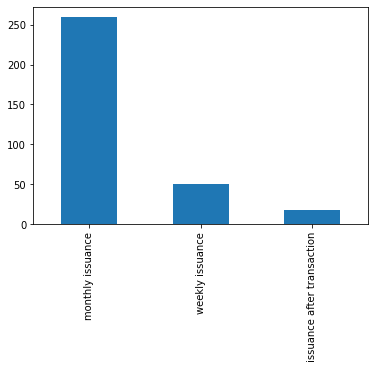

In [55]:
all_data_df['frequency'].value_counts().plot(kind='bar')

In [68]:
just_positive = all_data_df[all_data_df['loan status'] == 1] 
just_negative = all_data_df[all_data_df['loan status'] != 1] 

Text(0.5, 1.0, 'Frequency Of -1 loan status')

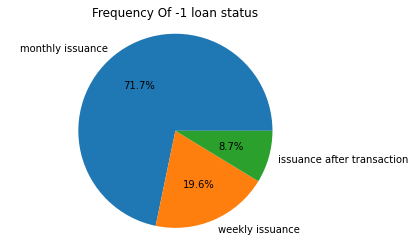

In [72]:
fig, ax = plt.subplots()
ax.pie(just_negative['frequency'].value_counts(), labels=just_negative['frequency'].unique(), autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Frequency Of negative loan status')

Text(0.5, 1.0, 'Frequency Of 1 loan status')

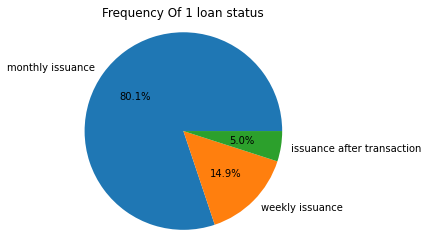

In [73]:
fig, ax = plt.subplots()
ax.pie(just_positive['frequency'].value_counts(), labels=just_positive['frequency'].unique(), autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Frequency Of positive loan status')


NOTE: The frequency doesnt seen relevant and the the is a ambalanig porportion.

KeyError: ('oper #1', 'oper #2', 'oper #3', 'oper #4', 'oper #5')

In [81]:
subset = all_data_df[['oper #1', 'oper #2', 'oper #3', 'oper #4', 'oper #5']].mean()
print(subset)


oper #1    13.737805
oper #2     3.285714
oper #3    11.742268
oper #4    16.306452
oper #5    35.159509
dtype: float64


Note: the distribution of the opr X atributes looks balanced with the expextion of the oper#2 and oper#5

In [77]:
all_data_df['# trans'].describe()

count    328.000000
mean      74.676829
std       44.843859
min        4.000000
25%       39.000000
50%       69.000000
75%      103.500000
max      196.000000
Name: # trans, dtype: float64

<AxesSubplot:xlabel='# trans', ylabel='Density'>

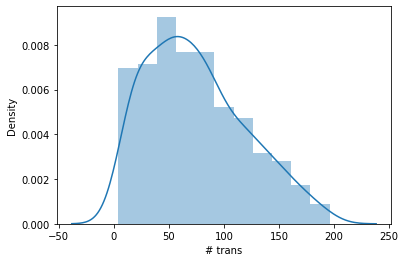

In [80]:
sns.distplot(all_data_df['# trans'])

##### Loan Amount 

In [83]:
all_data_df['loan amount'].describe()

count       328.000000
mean     145308.621951
std      105247.318098
min        4980.000000
25%       68328.000000
50%      114804.000000
75%      198600.000000
max      538500.000000
Name: loan amount, dtype: float64

<AxesSubplot:xlabel='loan amount', ylabel='Density'>

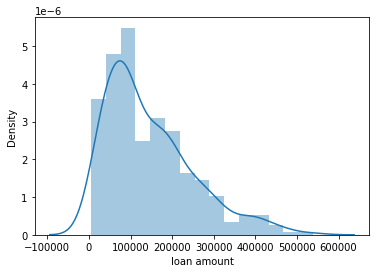

In [84]:
sns.distplot(all_data_df['loan amount'])

##### Average Salary 

In [97]:
all_data_df['average salary'].describe()

count      332.000000
mean      9552.012048
std       1320.441819
min       8110.000000
25%       8547.000000
50%       8994.000000
75%      10045.000000
max      12541.000000
Name: average salary, dtype: float64

<AxesSubplot:xlabel='average salary', ylabel='Density'>

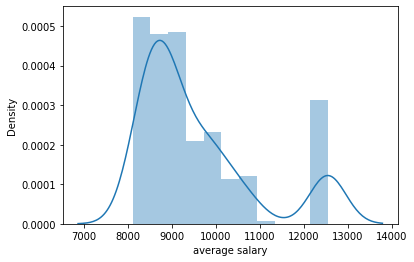

In [98]:
sns.distplot(all_data_df['average salary'])

##### Unemploymant Rate 

In [101]:
all_data_df['unemployment_increase'].describe()

count    332.000000
mean       0.621084
std        0.400144
min       -0.360000
25%        0.360000
50%        0.610000
75%        0.855000
max        2.060000
Name: unemployment_increase, dtype: float64

<AxesSubplot:>

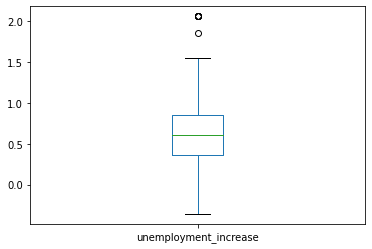

In [102]:
all_data_df['unemployment_increase'].plot.box()


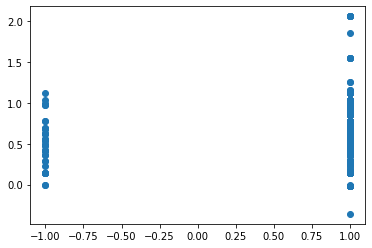

In [104]:
pyplot.scatter(all_data_df['loan status'], all_data_df['unemployment_increase'])


In [108]:
just_positive = all_data_df[all_data_df['loan status'] == 1] 
just_negative = all_data_df[all_data_df['loan status'] != 1]


In [111]:
just_positive.head

<bound method NDFrame.head of 0      1
1      1
2      1
3      1
4      1
      ..
327    1
328    1
329    1
330    1
331    1
Name: loan status, Length: 295, dtype: int64>

In [109]:
just_positive.describe()

count    295.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: loan status, dtype: float64

Remove the Frequency??? Since most of the payments are monthly issuance? 

In [56]:
# generate related variables
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot

In [60]:
all_data_df.columns

Index(['account_id', 'district_id', 'frequency', 'date', '# trans', 'oper #1',
       'oper #2', 'oper #3', 'oper #4', 'oper #5', 'type #1', 'type #2',
       'type #3', 'avg trans amount', 'avg trans balance', 'loan_id',
       'loan date', 'loan amount', 'loan duration (mths)', 'loan payments',
       'loan status'],
      dtype='object')

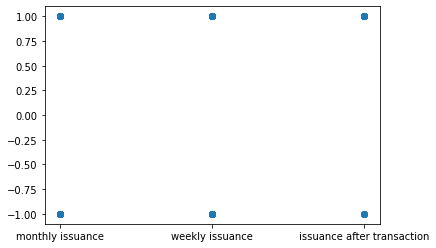

In [61]:
pyplot.scatter(all_data_df['frequency'], all_data_df['loan status'])
pyplot.show()